In [5]:
%matplotlib inline
import os, sys, json, pickle, ROOT
import numpy as np
import pandas as pd
import root_numpy as rnp
import matplotlib.pyplot as plt
from collections import OrderedDict as OD
from ipywidgets import interact, interactive, fixed, widgets
from NotebookUtils.ProgressBar import LogProgress as LP
plt.rcParams['font.family']='serif'
plt.rcParams['font.weight']='light'
plt.rcParams['font.size']=14
figsize = (12,8)

def Pandafy(fileName, tree):
    df = pd.DataFrame(rnp.root2array(fileName,tree))
    return df

dataPath = '/Users/sdporzio/Data/Decline/pmtana.root'

## Available trees in _opdetana_

KEY: TTree	flash;1	flash tree

KEY: TTree	cosmic_OpdetBeamLowGain_tree;1

KEY: TTree	cosmic_OpdetCosmicHighGain_tree;1

KEY: TTree	hitana_OpdetBeamLowGain_tree;1

KEY: TTree	hitwf_OpdetBeamLowGain_tree;1

KEY: TTree	hitana_OpdetCosmicHighGain_tree;1

KEY: TTree	hitwf_OpdetCosmicHighGain_tree;1

KEY: TTree	hitana_OpdetBeamHighGain_tree;1

KEY: TTree	hitwf_OpdetBeamHighGain_tree;1

In [9]:
# Load the ttree of interest
flash = Pandafy(dataPath,'opdetana/'+'flash')
print "Branches in opdetana/flash:"
for branch in flash.columns.values: print branch

Branches in opdetana/flash:
_run
_sub
_evt
_time
_pe
_y
_z
_yw
_zw


In [37]:
# Transform data in a manageable "histogram" form
data = dict()
nRows = len(flash)
bar = LP(np.zeros(nRows))
for i,row in flash.iterrows():
    run = str(int(row['_run']))
    if run not in data:
        data[run] = []
    else:
        data[run].append(row['_pe'])
    bar.next()
    

### Overall evolution of average P.E

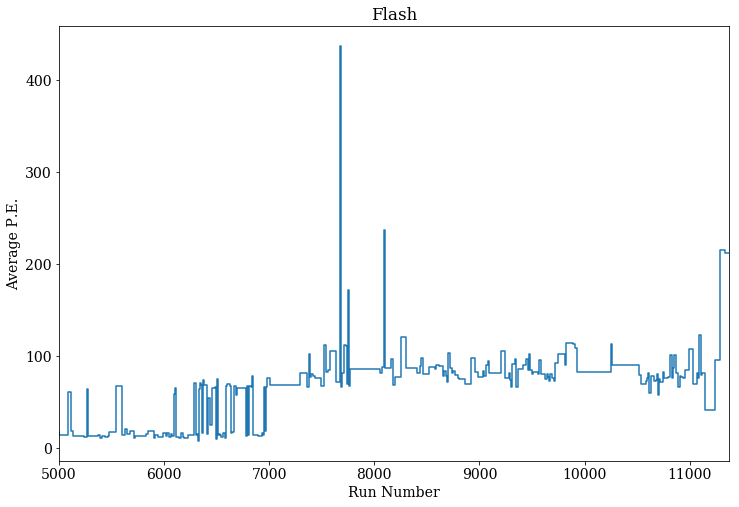

In [77]:
# Convert data for plot and sort it
toSort = []
for key in LP(data):
    flashes = np.array(data[key])
    x = int(key)
    y = flashes.mean()
    yErr = flashes.std()
    toSort.append([x,y,yErr])
df = pd.DataFrame(np.array(toSort))
result = df.sort_values([0])

# Make plots
fig = plt.figure(figsize=figsize)
plt.step(result[0],result[1])
plt.xlim(result[0].values[0],result[0].values[-1])
plt.title("Flash P.E. over time")
plt.xlabel('Run Number')
plt.ylabel('Average P.E.')
plt.show()

### P.E distributions in different time ranges

Looking at P.E. distributions in different run ranges according to regions in previous plot

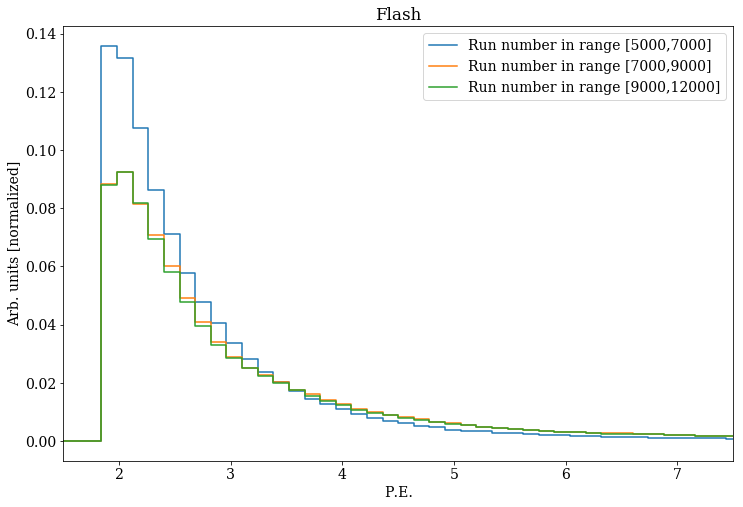

In [118]:
# Wrapping it up in a function
def RangesPlot(ranges):
    # Transform data for distributions
    nPlots = len(ranges)
    flashes = [[] for x in range(nPlots)]
    for i,rang in enumerate(ranges):
        for key in LP(data):
            if int(key) > rang[0] and int(key) < rang[1]:
                for flash in data[key]:
                    flashes[i].append(flash)
    # Plot distributions
    fig = plt.figure(figsize=figsize)
    for i in range(nPlots):
        flashes[i] = np.array(flashes[i])
        hist, bins = np.histogram(flashes[i],bins=50,range=(1,8))
        normHist = hist/float(len(flashes[i]))
        plt.step(bins[:-1],normHist,label='Run number in range [%i,%i]' %(ranges[i][0],ranges[i][1]))
    plt.xlim(1.5,7.5)
    plt.title('Flash')
    plt.xlabel('P.E.')
    plt.ylabel('Arb. units [normalized]')
    plt.legend(loc='best')
    plt.show()
    
# Now run it
ranges = [
    [5000,7000],
    [7000,9000],
    [9000,12000]
]
RangesPlot(ranges)

As expected the earlier times have a different distribution, but that is due to the discrete step happens (around run 700) rather than showing a steady change like the one shown in David's slides.

Using now smaller ranges, and ignoring the regions (first and last) where the discrete change happened

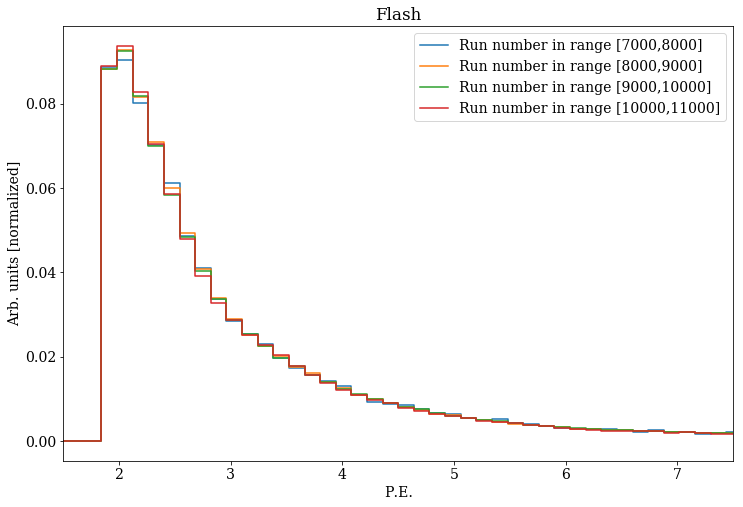

In [122]:
ranges = [
    [7000,8000],
    [8000,9000],
    [9000,10000],
    [10000,11000]
]
RangesPlot(ranges)

Can't really see a trend in there.